In [1]:
!pip install ultralytics
!pip install moviepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [4]:
# Import necessary libraries
from moviepy.editor import VideoFileClip
from IPython.display import Video
from ultralytics import YOLO  # Ensure correct import for YOLO

# Define the function to check video metadata
def check_video_metadata(file_path):
    video = VideoFileClip(file_path)
    print(f"Duration: {video.duration}")
    print(f"Frame rate: {video.fps}")
    print(f"Resolution: {video.size}")

# Check the metadata of the original video
check_video_metadata('/content/Sign.mp4')

# Speed up the video (e.g., double speed)
!ffmpeg -i /content/Sign.mp4 -filter:v "setpts=0.5*PTS" /content/Sign_fast.mp4

# Display the speeded-up video
Video("/content/Sign_fast.mp4", width=960)

# Load the YOLO model
loaded_model = YOLO('/content/best_yolov10.onnx')

# Make predictions using the speeded-up video
results = loaded_model.predict(source="/content/Sign_fast.mp4", show=True, save=True)

# Convert the result video format if necessary
!ffmpeg -y -loglevel panic -i /content/runs/detect/predict/video.avi /content/result_out.mp4

# Display the prediction result video
# Video("/content/result_out.mp4", width=960 ,  embed=True)


Duration: 27.75
Frame rate: 24.0
Resolution: [1280, 720]
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --en

Size: (149, 234)
Mode: RGB
Format: JPEG
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Loading /content/best_yolov10.onnx for ONNX Runtime inference...

image 1/1 /content/OIP.jpg: 640x640 1 Stop, 236.2ms
Speed: 12.2ms preprocess, 236.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


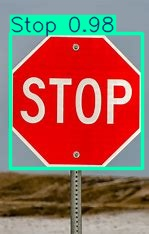

In [8]:
# Import necessary libraries
from PIL import Image
from ultralytics import YOLO  # Ensure correct import for YOLO

# Define the function to check image metadata
def check_image_metadata(file_path):
    with Image.open(file_path) as img:
        print(f"Size: {img.size}")
        print(f"Mode: {img.mode}")
        print(f"Format: {img.format}")

# Check the metadata of the original image
check_image_metadata('/content/OIP.jpg')

# Load the YOLO model
loaded_model = YOLO('/content/best_yolov10.onnx')

# Make predictions using the image
results = loaded_model.predict(source="/content/OIP.jpg", show=True, save=True)

# Display the prediction result image
from IPython.display import Image as IPImage
IPImage("/content/runs/detect/predict2/OIP.jpg")
